# Inspecting and cleaning the credit card data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
filepath = '../data/input/'
filename = 'default of credit card clients'

#load data set
df = pd.read_excel(filepath+filename+'.xls', index_col=0,skiprows=[0])


In [3]:
#show first 5 rows
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#compute correlation
corr = df.corr()

#plot correlation
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1,0.0248,-0.219,-0.108,0.145,-0.271,-0.296,-0.286,-0.267,-0.249,-0.235,0.285,0.278,0.283,0.294,0.296,0.29,0.195,0.178,0.21,0.203,0.217,0.22,-0.154
SEX,0.0248,1,0.0142,-0.0314,-0.0909,-0.0576,-0.0708,-0.0661,-0.0602,-0.0551,-0.044,-0.0336,-0.0312,-0.0246,-0.0219,-0.017,-0.0167,-0.000242,-0.00139,-0.0086,-0.00223,-0.00167,-0.00277,-0.04
EDUCATION,-0.219,0.0142,1,-0.143,0.175,0.105,0.122,0.114,0.109,0.0975,0.0823,0.0236,0.0187,0.013,-0.000451,-0.00757,-0.0091,-0.0375,-0.03,-0.0399,-0.0382,-0.0404,-0.0372,0.028
MARRIAGE,-0.108,-0.0314,-0.143,1,-0.414,0.0199,0.0242,0.0327,0.0331,0.0356,0.0343,-0.0235,-0.0216,-0.0249,-0.0233,-0.0254,-0.0212,-0.00598,-0.00809,-0.00354,-0.0127,-0.0012,-0.00664,-0.0243
AGE,0.145,-0.0909,0.175,-0.414,1,-0.0394,-0.0501,-0.053,-0.0497,-0.0538,-0.0488,0.0562,0.0543,0.0537,0.0514,0.0493,0.0476,0.0261,0.0218,0.0292,0.0214,0.0228,0.0195,0.0139
PAY_0,-0.271,-0.0576,0.105,0.0199,-0.0394,1,0.672,0.574,0.539,0.509,0.475,0.187,0.19,0.18,0.179,0.181,0.177,-0.0793,-0.0701,-0.0706,-0.064,-0.0582,-0.0587,0.325
PAY_2,-0.296,-0.0708,0.122,0.0242,-0.0501,0.672,1,0.767,0.662,0.623,0.576,0.235,0.235,0.224,0.222,0.221,0.219,-0.0807,-0.059,-0.0559,-0.0469,-0.0371,-0.0365,0.264
PAY_3,-0.286,-0.0661,0.114,0.0327,-0.053,0.574,0.767,1,0.777,0.687,0.633,0.208,0.237,0.227,0.227,0.225,0.222,0.00129,-0.0668,-0.0533,-0.0461,-0.0359,-0.0359,0.235
PAY_4,-0.267,-0.0602,0.109,0.0331,-0.0497,0.539,0.662,0.777,1,0.82,0.716,0.203,0.226,0.245,0.246,0.243,0.239,-0.00936,-0.00194,-0.0692,-0.0435,-0.0336,-0.0266,0.217
PAY_5,-0.249,-0.0551,0.0975,0.0356,-0.0538,0.509,0.623,0.687,0.82,1,0.817,0.207,0.227,0.243,0.272,0.27,0.263,-0.00609,-0.00319,0.00906,-0.0583,-0.0333,-0.023,0.204


In [5]:
#print correlation
corr.loc['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

### Taking a closer look at the values of the variables
We want to inspect for possible errors in the dataset. These are the legal values for the different variables:

* LIMIT_BAL: $\geq$ 0
* SEX: 1,2
* EDUCATION: 1,2,3,4,5
* MARRIAGE: 1,2,3
* AGE: $\geq$ 0
* PAY_* 0, 2-6: -1, 1, 2, 3, 4, 5, 6, 7, 8, 9
* BILL_AMT* 1-6: $\geq$ 0
* PAY_AMT* 1-6: $\geq$ 0
* default payment next month: 0, 1

We start by looking at the categorical variables.

In [6]:
#define values with limited number of legal values
variables= ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3', 'PAY_4','PAY_5','PAY_6','default payment next month']

#print count of values for variables with limited possible values
for variable in variables:
    print('Variable '+variable)
    print('Value|Count')
    print(df[variable].value_counts())
    print('\n')

Variable SEX
Value|Count
2    18112
1    11888
Name: SEX, dtype: int64


Variable EDUCATION
Value|Count
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


Variable MARRIAGE
Value|Count
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


Variable PAY_0
Value|Count
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


Variable PAY_2
Value|Count
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


Variable PAY_3
Value|Count
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


Variable PAY_4
Value|Count
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       3

We find the following illegal values:
* EDUCATION: 0, 5, 6
* MARRIAGE: 0
* PAY_*: -2, 0

In order to get an ide about the non-categorical values, we can look at histograms of the values.

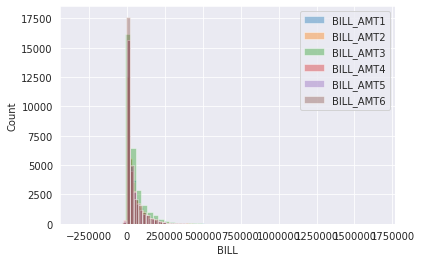

In [7]:
#Plot histogram of past payments and bills to look for illeagl values
fig, ax = plt.subplots()
for i in range(1,7):
    sns.distplot(df['BILL_AMT{}'.format(i)],ax=ax, kde=False,label='BILL_AMT{}'.format(i))
plt.ylabel('Count')
plt.xlabel('BILL')
plt.legend()

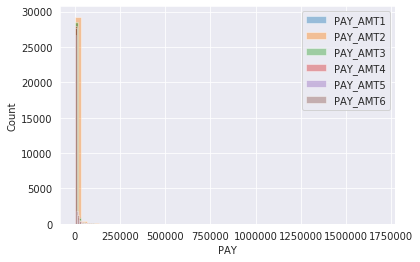

In [8]:
fig, ax = plt.subplots()
for i in range(1,7):
    sns.distplot(df['PAY_AMT{}'.format(i)],ax=ax, kde=False,label='PAY_AMT{}'.format(i))
plt.ylabel('Count')
plt.xlabel('PAY')
plt.legend()

Text(0, 0.5, 'Count')

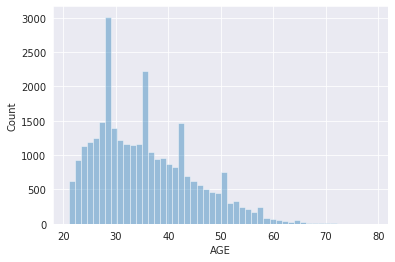

In [9]:
# Same for age
sns.distplot(df['AGE'], kde=False)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

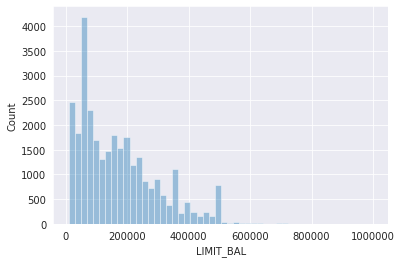

In [10]:
# ...and amount of given credit
sns.distplot(df['LIMIT_BAL'], kde=False)
plt.ylabel('Count')

We see that BILL_AMT* contains negative numbers.

# Now the clean up starts

In [11]:
print('# of entries before clean up: {}'.format(len(df.index)))

# Remove instances with zeros only for past bill statements and paid amounts
'''
df = df.drop(df[(df.BILL_AMT1 == 0) &
                (df.BILL_AMT2 == 0) &
                (df.BILL_AMT3 == 0) &
                (df.BILL_AMT4 == 0) &
                (df.BILL_AMT5 == 0) &
                (df.BILL_AMT6 == 0)].index)

df = df.drop(df[(df.PAY_AMT1 == 0) &
                (df.PAY_AMT2 == 0) &
                (df.PAY_AMT3 == 0) &
                (df.PAY_AMT4 == 0) &
                (df.PAY_AMT5 == 0) &
                (df.PAY_AMT6 == 0)].index)
'''
df = df.drop(df[(df.BILL_AMT1 == 0) &
                (df.BILL_AMT2 == 0) &
                (df.BILL_AMT3 == 0) &
                (df.BILL_AMT4 == 0) &
                (df.BILL_AMT5 == 0) &
                (df.BILL_AMT6 == 0) &
                (df.PAY_AMT1 == 0) &
                (df.PAY_AMT2 == 0) &
                (df.PAY_AMT3 == 0) &
                (df.PAY_AMT4 == 0) &
                (df.PAY_AMT5 == 0) &
                (df.PAY_AMT6 == 0)].index)


# Remove illegal education value
df = df.drop(df[(df.EDUCATION == 0) |
                (df.EDUCATION == 5) |
                (df.EDUCATION == 6)].index)

# Remove illegal marriage value
df = df.drop(df[(df.MARRIAGE == 0)].index)

# Remove illegal pay value
df = df.drop(df[(df.PAY_0 == -2) |
                (df.PAY_2 == -2) |
                (df.PAY_3 == -2) |
                (df.PAY_4 == -2) |
                (df.PAY_5 == -2) |
                (df.PAY_6 == -2)].index)

df = df.drop(df[(df.PAY_0 == 0) |
                (df.PAY_2 == 0) |
                (df.PAY_3 == 0) |
                (df.PAY_4 == 0) |
                (df.PAY_5 == 0) |
                (df.PAY_6 == 0)].index)

# Remove negative bill and pay amounts
df = df.drop(df[(df.BILL_AMT1 < 0) |
                (df.BILL_AMT2 < 0) |
                (df.BILL_AMT3 < 0) |
                (df.BILL_AMT4 < 0) |
                (df.BILL_AMT5 < 0) |
                (df.BILL_AMT6 < 0)].index)

df = df.drop(df[(df.PAY_AMT1 < 0) |
                (df.PAY_AMT2 < 0) |
                (df.PAY_AMT3 < 0) |
                (df.PAY_AMT4 < 0) |
                (df.PAY_AMT5 < 0) |
                (df.PAY_AMT6 < 0)].index)



print('# of entries after clean up: {}'.format(len(df.index)))

# of entries before clean up: 30000
# of entries after clean up: 3792


### Features of the cleand up data set

In [12]:
#Look at value count after clean up
for variable in variables:
    print('Variable '+variable)
    print('Value|Count')
    print(df[variable].value_counts())
    print('\n')

Variable SEX
Value|Count
2    2244
1    1548
Name: SEX, dtype: int64


Variable EDUCATION
Value|Count
2    1627
1    1558
3     598
4       9
Name: EDUCATION, dtype: int64


Variable MARRIAGE
Value|Count
1    1952
2    1808
3      32
Name: MARRIAGE, dtype: int64


Variable PAY_0
Value|Count
-1    2214
 2     778
 1     565
 3     162
 4      34
 8      19
 7       9
 5       8
 6       3
Name: PAY_0, dtype: int64


Variable PAY_2
Value|Count
-1    2224
 2    1328
 3     135
 4      58
 7      20
 6      12
 5      10
 1       4
 8       1
Name: PAY_2, dtype: int64


Variable PAY_3
Value|Count
-1    2223
 2    1323
 3     122
 4      50
 7      27
 6      23
 5      20
 8       3
 1       1
Name: PAY_3, dtype: int64


Variable PAY_4
Value|Count
-1    2304
 2    1222
 3     105
 4      62
 7      58
 5      34
 6       4
 8       2
 1       1
Name: PAY_4, dtype: int64


Variable PAY_5
Value|Count
-1    2345
 2    1165
 3     131
 4      75
 7      57
 5      14
 6       4
 8       1
Name

In [13]:
#Look again at correlation, after clean up

#compute correlation
corr = df.corr()

#plot correlation
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1,-0.0187,-0.267,-0.139,0.206,-0.386,-0.427,-0.423,-0.423,-0.434,-0.43,0.0516,0.0444,0.0437,0.0523,0.035,0.052,0.274,0.256,0.263,0.272,0.261,0.221,-0.287
SEX,-0.0187,1,0.016,0.00229,-0.0908,-0.0667,-0.0742,-0.0796,-0.0903,-0.0938,-0.0867,-0.0504,-0.047,-0.0408,-0.0513,-0.0463,-0.0502,0.00353,0.0305,-0.0108,0.014,0.00428,0.0237,-0.0609
EDUCATION,-0.267,0.016,1,-0.148,0.166,0.177,0.19,0.194,0.201,0.199,0.182,0.0205,0.0268,0.0232,0.0209,0.025,0.0185,-0.072,-0.0894,-0.0893,-0.0897,-0.0699,-0.0781,0.102
MARRIAGE,-0.139,0.00229,-0.148,1,-0.469,0.0508,0.0571,0.0655,0.0697,0.0622,0.0703,-0.0108,-0.0123,-0.013,-0.0101,-0.0142,-0.0119,-0.0368,-0.0279,-0.023,-0.0444,-0.0269,-0.00132,0.0178
AGE,0.206,-0.0908,0.166,-0.469,1,-0.0683,-0.0768,-0.0687,-0.0712,-0.069,-0.0679,0.0148,0.017,0.0181,0.0168,0.0172,0.0229,0.0759,0.0672,0.0577,0.0789,0.0807,0.0234,0.000491
PAY_0,-0.386,-0.0667,0.177,0.0508,-0.0683,1,0.822,0.787,0.793,0.786,0.753,0.45,0.456,0.454,0.447,0.455,0.439,-0.158,-0.146,-0.137,-0.152,-0.119,-0.105,0.486
PAY_2,-0.427,-0.0742,0.19,0.0571,-0.0768,0.822,1,0.841,0.81,0.806,0.778,0.459,0.46,0.466,0.456,0.467,0.452,-0.193,-0.141,-0.147,-0.158,-0.127,-0.101,0.476
PAY_3,-0.423,-0.0796,0.194,0.0655,-0.0687,0.787,0.841,1,0.879,0.865,0.838,0.409,0.422,0.421,0.418,0.428,0.414,-0.153,-0.17,-0.135,-0.159,-0.135,-0.113,0.468
PAY_4,-0.423,-0.0903,0.201,0.0697,-0.0712,0.793,0.81,0.879,1,0.943,0.91,0.383,0.391,0.401,0.393,0.405,0.392,-0.162,-0.132,-0.158,-0.156,-0.142,-0.11,0.475
PAY_5,-0.434,-0.0938,0.199,0.0622,-0.069,0.786,0.806,0.865,0.943,1,0.94,0.382,0.393,0.401,0.4,0.409,0.397,-0.154,-0.134,-0.133,-0.171,-0.143,-0.113,0.485


In [14]:
#print correlation
corr.loc['default payment next month']

LIMIT_BAL                    -0.286641
SEX                          -0.060940
EDUCATION                     0.101871
MARRIAGE                      0.017804
AGE                           0.000491
PAY_0                         0.485559
PAY_2                         0.475575
PAY_3                         0.467648
PAY_4                         0.475204
PAY_5                         0.485063
PAY_6                         0.482266
BILL_AMT1                     0.227044
BILL_AMT2                     0.234989
BILL_AMT3                     0.233607
BILL_AMT4                     0.232211
BILL_AMT5                     0.241553
BILL_AMT6                     0.234208
PAY_AMT1                     -0.160082
PAY_AMT2                     -0.152113
PAY_AMT3                     -0.128054
PAY_AMT4                     -0.136073
PAY_AMT5                     -0.120877
PAY_AMT6                     -0.107826
default payment next month    1.000000
Name: default payment next month, dtype: float64

Text(0, 0.5, 'Density')

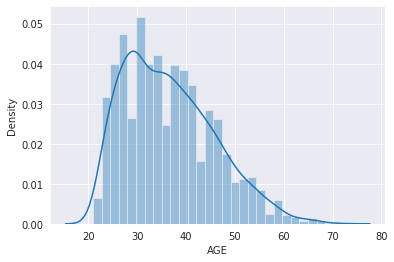

In [15]:
# Some distributions
sns.set_style('darkgrid')
sns.distplot(df['AGE'])
plt.ylabel('Density')

Text(0, 0.5, 'Density')

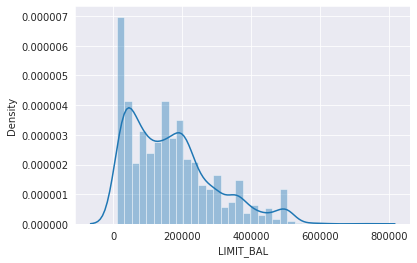

In [16]:
sns.distplot(df['LIMIT_BAL'])
plt.ylabel('Density')

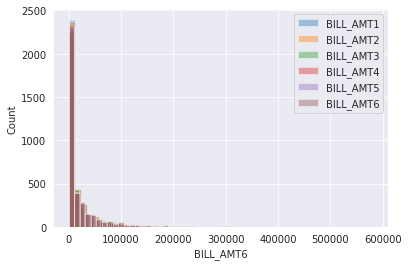

In [17]:
fig, ax = plt.subplots()
for i in range(1,7):
    sns.distplot(df['BILL_AMT{}'.format(i)],ax=ax, kde=False,label='BILL_AMT{}'.format(i))
plt.ylabel('Count')
plt.legend()

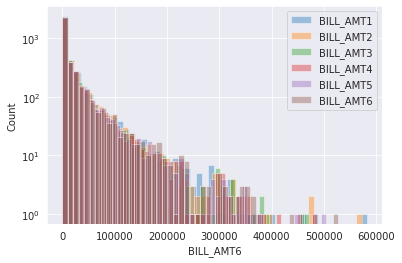

In [18]:
# Now in log-scale
fig, ax = plt.subplots()
for i in range(1,7):
    sns.distplot(df['BILL_AMT{}'.format(i)],ax=ax, kde=False,label='BILL_AMT{}'.format(i),hist_kws={'log':True})
plt.ylabel('Count')
plt.legend()

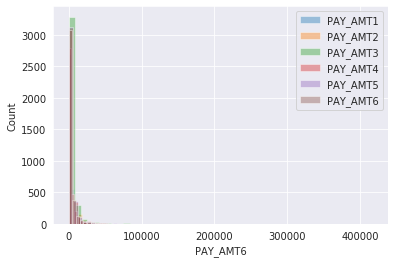

In [19]:
fig, ax = plt.subplots()
for i in range(1,7):
    sns.distplot(df['PAY_AMT{}'.format(i)],ax=ax, kde=False,label='PAY_AMT{}'.format(i))
plt.ylabel('Count')
plt.legend()

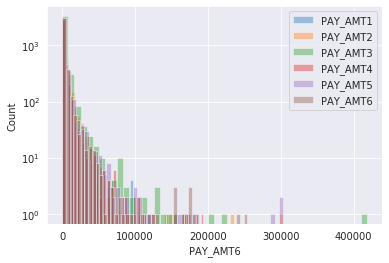

In [20]:
# Now in log-scale
fig, ax = plt.subplots()
for i in range(1,7):
    sns.distplot(df['PAY_AMT{}'.format(i)],ax=ax, kde=False,label='PAY_AMT{}'.format(i),hist_kws={'log':True})
plt.ylabel('Count')
plt.legend()

In [21]:
#And, finaly, saving the clean data 
df.to_pickle(filepath+filename+'_clean.pkl')

In [22]:
#to read, use df = pd.read_pickle(file_name)
df = pd.read_pickle(filepath+filename+'_clean.pkl')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
22,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
29,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
31,230000,2,1,2,27,-1,-1,-1,-1,-1,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
49,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0
